NOTES and COMMENTS:
There is a small increase in the number of rides when the weather is warmer.
It is possible that this difference would be more noticiable if we had data for the whole year.
Currenlty we only have data from July to Sep which means the difference in weather temperature is not drastic.

So far it seems warmer weather means more Uber rides.
It would be interesting to see the relationship between good/bad weather (e.g. sunny, raining, etc) and the number of rides.

* Does the weather affect the number of Uber rides in the city of New York?

  * Hypothesis - If the weather is related to the number of Uber rides, then a consistent and numeric corraltion will show how the number of rides increases or decreseas depeding on the weather over a three month period.

  * Null Hypothesis - If the weather is not related to the number of Uber rides, then there will be no consistent corraltion and the increase or decrese of Uber rides will be indepentend to the change in weather.


In [46]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import scipy.stats as stats

from datetime import date


temperature_to_load = "temperature.csv"

temperature_data = pd.read_csv(temperature_to_load)
temperature_data.head(5)


,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [47]:
# File to Load (Remember to Change These)
uber_to_load = "ubernyc.csv"

uber_data = pd.read_csv(uber_to_load)
uber_data.head(5)

,DATE,TIME,PICK UP ADDRESS
0,7/1/14,12:00:00 AM,"874 E 139th St Mott Haven, BX"
1,7/1/14,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2,7/1/14,12:01:00 AM,"601 E 156th St South Bronx, BX"
3,7/1/14,12:01:00 AM,"708 E 138th St Mott Haven, BX"
4,7/1/14,12:02:00 AM,"700 E 140th St Mott Haven, BX"


In [48]:
#from ubernyc.csv merge the columns DATE and TIME and round the time hours
uber_data.index = pd.to_datetime(uber_data["DATE"] + " " + uber_data["TIME"])
uber_data.head(5)

,DATE,TIME,PICK UP ADDRESS
2014-07-01 00:00:00,7/1/14,12:00:00 AM,"874 E 139th St Mott Haven, BX"
2014-07-01 00:01:00,7/1/14,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2014-07-01 00:01:00,7/1/14,12:01:00 AM,"601 E 156th St South Bronx, BX"
2014-07-01 00:01:00,7/1/14,12:01:00 AM,"708 E 138th St Mott Haven, BX"
2014-07-01 00:02:00,7/1/14,12:02:00 AM,"700 E 140th St Mott Haven, BX"


In [49]:
ut = uber_data.index.round("H")
ut = pd.DataFrame(ut)
print(ut)

                        0
0     2014-07-01 00:00:00
1     2014-07-01 00:00:00
2     2014-07-01 00:00:00
3     2014-07-01 00:00:00
4     2014-07-01 00:00:00
5     2014-07-01 00:00:00
6     2014-07-01 00:00:00
7     2014-07-01 00:00:00
8     2014-07-01 00:00:00
9     2014-07-01 00:00:00
10    2014-07-01 00:00:00
11    2014-07-01 00:00:00
12    2014-07-01 00:00:00
13    2014-07-01 00:00:00
14    2014-07-01 00:00:00
15    2014-07-01 00:00:00
16    2014-07-01 00:00:00
17    2014-07-01 00:00:00
18    2014-07-01 00:00:00
19    2014-07-01 00:00:00
20    2014-07-01 01:00:00
21    2014-07-01 01:00:00
22    2014-07-01 01:00:00
23    2014-07-01 01:00:00
24    2014-07-01 01:00:00
25    2014-07-01 01:00:00
26    2014-07-01 01:00:00
27    2014-07-01 01:00:00
28    2014-07-01 01:00:00
29    2014-07-01 01:00:00
...                   ...
91682 2014-09-30 23:00:00
91683 2014-09-30 23:00:00
91684 2014-09-30 23:00:00
91685 2014-09-30 23:00:00
91686 2014-09-30 23:00:00
91687 2014-09-30 23:00:00
91688 2014-0

In [50]:
# Use this code if/when storing df in csv for using in Excel or similar
# #Export the ut into a csv
# with open('test3.csv', mode='w') as output_data_file:
#     NYC_df.to_csv(output_data_file, index_label="Index")


In [51]:
#take column from ut df with timestamps and make it into a list.
list1 = []
list1 = ut[0].tolist()

In [52]:
#count the number of uber rides per hour. The output looks like a library key: value, Key is the time and value the number of rides during that time
counter=collections.Counter(list1)

df_time_as_header = pd.DataFrame(counter, index=[0])
#transponde df_time_as_header to get correct format, one hour per row insated of one hour per column
df_final = df_time_as_header.T
df_final.head(5)

,0
2014-07-01 00:00:00,20
2014-07-01 01:00:00,33
2014-07-01 02:00:00,21
2014-07-01 03:00:00,15
2014-07-01 04:00:00,19


In [53]:
#rename axis so that later the two df (Uber and Temperature) can  be merged using their index
df_final.rename_axis('datetime')

#rename column, by default 0, to 'number_of_rides' and change the name of the df to be more descriptive
df_number_of_rides_per_hour = df_final.rename(columns={0: 'number_of_rides'})

In [54]:
def kelvin_to_fahr(temp_kelvin):
    temp_fahr = (((temp_kelvin - 273) * 9/5) + 32)
    return temp_fahr

In [55]:
#select columns 'datetime' and 'New York' from tempreature data and store in a new df NYC_df
NYC_df = temperature_data[['datetime', 'New York']].copy()

#make datetime the index for 'NYC_df' df
NYC_df.set_index('datetime', inplace=True)

#rename New York column to be Temperature in K
NYC_df = NYC_df.rename(columns={'New York': 'Temperature K'})

NYC_df = NYC_df.join(df_number_of_rides_per_hour, how='inner')


NYC_df["Temperature K"] = kelvin_to_fahr(NYC_df["Temperature K"])
NYC_df = NYC_df.rename(columns={'Temperature K': 'Temperature F', 'number_of_rides': 'Number of Rides'})
NYC_df.head()

,Temperature F,Number of Rides
2014-07-01 00:00:00,82.238,20
2014-07-01 01:00:00,80.222,33
2014-07-01 02:00:00,77.432,21
2014-07-01 03:00:00,76.298,15
2014-07-01 04:00:00,75.596,19


In [56]:
w_description_to_load = "weather_description.csv"

w_description = pd.read_csv(w_description_to_load)
w_description.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [57]:
NYCw_df = w_description[['datetime', 'New York']]

NYCw_df.set_index('datetime', inplace=True)

NYCw_df = NYCw_df.rename(columns={'New York': 'Weather Description'})

NYC_df = NYC_df.join(NYCw_df, how='inner')

NYC_df

,Temperature F,Number of Rides,Weather Description
2014-07-01 00:00:00,82.238,20,sky is clear
2014-07-01 01:00:00,80.222,33,broken clouds
2014-07-01 02:00:00,77.432,21,few clouds
2014-07-01 03:00:00,76.298,15,few clouds
2014-07-01 04:00:00,75.596,19,few clouds
2014-07-01 05:00:00,75.182,21,few clouds
2014-07-01 06:00:00,74.948,31,few clouds
2014-07-01 07:00:00,74.192,28,few clouds
2014-07-01 08:00:00,73.076,62,scattered clouds
2014-07-01 09:00:00,72.788,62,scattered clouds


This for loop allows you to slice the data by taking samples (e.g. temperatue and number of rides) for a given time of the day of the week, for every week. E.g. take samples at 10:00am for every Tuesday thorugh out the whole data set.
The data is stored in two lists, temp and rides. These can be used for plotting.

In [58]:
#takes a sample every week
#in order to gather one value per week calculate the lenght of the data set and divide it by (24 hours * 7 days)
counter247 = len(NYC_df.iloc[:,0:1])/(24*7)
#'time_of_day'  is the first value that will be used, e.g. look for the time and date on the first week of the csv
#inter the index value of the csv as the 'time_of_day' and you will get one sample for every week at that
#exact time of the day
# e.g. Use time_of_day = 0 for mid-night, or 13 for 1:00pm and so on

##########################
time_of_day = 23  ########
##########################

temp_weekly = []
rides_weekly = []

for x in range(int(counter247)):
    b = NYC_df.iloc[time_of_day,]
    b = pd.DataFrame(b)
    # add temperature to list
    temp_weekly.append(b.iat[0,0])
    # add number of rides to list
    rides_weekly.append(b.iat[1,0])
    time_of_day = time_of_day + 168 #168 (24*7) takes a sample every week
    

#creat dictoniry if needed
k = dict(zip(temp_weekly,rides_weekly))
k

{88.64600000000004: 53,
 88.75399999999995: 62,
 75.48800000000004: 33,
 84.99199999999999: 45,
 71.83399999999999: 35,
 81.85999999999999: 38,
 73.81400000000004: 48,
 79.19600000000005: 52,
 80.6: 47,
 86.75600000000003: 46,
 69.458: 46,
 65.408: 34,
 66.52400000000002: 39}

Plotting exmaple using a bar chart to show lists temp_weekly nd rides_weekly

(55, 100)

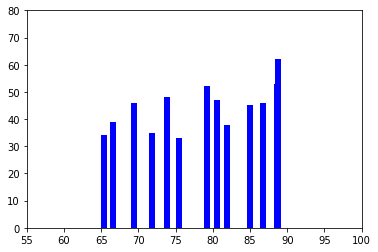

In [59]:
plt.bar(temp_weekly, rides_weekly, color="b", align="center")
plt.ylim(0, 80)
plt.xlim(55, 100)

This for loop allows you to slice the data by taking samples (e.g. temperatue and number of rides) for a given time of the day, for every day in the dataset. The data is stored in two lists, temp and rides. These can be used for plotting.

In [60]:
#takes a sample every week
#in order to gather one value per week calculate the lenght of the data set and divide it by (24 hours * 7 days)
counter24 = len(NYC_df.iloc[:,0:1])/24
#'time_of_day'  is the first value that will be used, e.g. look for the time and date on the first week of the csv
#inter the index value of the csv as the 'time_of_day' and you will get one sample for every week at that
#exact time of the day
# e.g. Use time_of_day = 0 for mid-night, or 13 for 1:00pm and so on

#########################
time_of_day = 22   #######
#########################


temp_daily = []
rides_daily = []

for x in range(int(counter24)):
    b = NYC_df.iloc[time_of_day,]
    b = pd.DataFrame(b)
    # add temperature to list
    temp_daily.append(b.iat[0,0])
    # add number of rides to list
    rides_daily.append(b.iat[1,0])
    time_of_day = time_of_day + 24 # 24 takes a sample every 24 rows, which is 24 hours
    

#creat dictoniry if needed
k = dict(zip(temp_daily,rides_daily))


Plotting exmaple using a bar chart to show lists temp_daily and rides_daily

(55, 100)

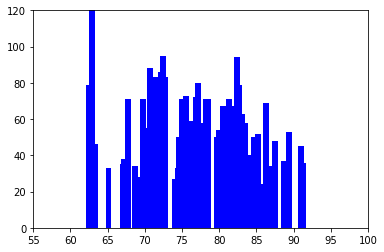

In [61]:
plt.bar(temp_daily, rides_daily, color="b", align="center")
plt.ylim(0, 120)
plt.xlim(55, 100)

Calcualte the average number of rides within a range of temperatures.
In this example 'cold' is the average number of rides when the temperature is below 60 degrees.
'warm' is the average number of rides between 60 and 80 degrees
'hot' is 80 and above.

In [68]:
number_rides_total_mean = NYC_df["Number of Rides"].mean()
cold_df = NYC_df.loc[NYC_df['Temperature F'] < 60]
cold = cold_df["Number of Rides"].mean()
warm_df = NYC_df.loc[NYC_df['Temperature F'] > 60]
warm_df = warm_df.loc[warm_df['Temperature F'] < 79]
warm = warm_df["Number of Rides"].mean()

hot_df = NYC_df.loc[NYC_df['Temperature F'] > 79]
hot = hot_df["Number of Rides"].mean()

print(f"The average number of rides for cold weather is {int(cold)}, for warm weather is {int(warm)}, and for hot weather is {int(hot)}")



The average number of rides for cold weather is 38, for warm weather is 40, and for hot weather is 44


41.51742870076958

In [88]:
observed = pd.Series([cold, warm, hot], index=["1", "2", "3"])
# Create a data frame
df_test = pd.DataFrame([observed]).T
#df_test.columns = ["observed", "expected"]
df_test[1] = number_rides_total_mean
# With four rows, the degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
# Run the chi square test with stats.chisquare()
df_test = df_test.rename(columns={0: 'observed'})
df_test = df_test.rename(columns={1: 'expected'})
df_test
stats.chisquare(df_test['observed'], df_test['expected'])


Power_divergenceResult(statistic=0.47179856984903373, pvalue=0.7898602207587081)

In [63]:
# Calculate Independent (Two Sample) T-Test
# in this example there are 434 data samples for hot and 202 for cold
stats.ttest_ind(cold_df["Number of Rides"], hot_df["Number of Rides"], equal_var=False)

Ttest_indResult(statistic=-4.27897889570132, pvalue=2.4543441025310156e-05)

In [64]:
#hot_df_short and cold_df are both 202 samples
hot_df_short = hot_df.iloc[0:202,0:1]
cold_df
hot_df_short = hot_df_short.rename(columns={"Temperature F": 'Temperature_F'})
cold_df_short = cold_df.rename(columns={"Temperature F": 'Temperature_F'})


In [65]:
stats.ttest_ind(hot_df_short.Temperature_F, cold_df_short.Temperature_F, equal_var=False)

Ttest_indResult(statistic=83.5908551419822, pvalue=2.6764784244842954e-253)

In [66]:
# With four rows, the degree of freedom is 202-1 = 201
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [67]:
# Run the chi square test with stats.chisquare()
stats.chisquare(hot_df_short['Temperature_F'], cold_df_short['Temperature_F'])

Power_divergenceResult(statistic=2978.0930426403706, pvalue=0.0)